In [302]:
import numpy as np 
from matplotlib import pyplot as plt 
%matplotlib inline 

In [303]:
plt.style.use('dark_background')

In [304]:
Lx=0.01
Ly=0.01
nx=21
ny=21
dx=Lx/(nx-1)
dy=Ly/(ny-1)
a=1e-4
x=np.linspace(0.0, Lx, num=nx)
y=np.linspace(0.0, Ly, num=ny)
Tb=100.0
Tavg=20.0
dt=0.0006
CFLx=a*dt/dx**2
CFLy=a*dt/dy**2
CFL=min(CFLx, CFLy, 0.25)
qx=0.0
qy=0.0
nt=400
CFL
I=int((nx+1)/2)
J=int((ny+1)/2)

In [305]:
from scipy import linalg

In [306]:
def lhs_operator(N, CFL0):
    D = np.diag((2.0 + 1.0 / CFL0) * np.ones(N))
    D[-1, -1] = 1.0 + 1.0 / CFL0
    U = np.diag(-1.0 * np.ones(N - 1), k=1)
    L = np.diag(-1.0 * np.ones(N - 1), k=-1)
    A = D + U + L
    return A

In [307]:
def rhs_vector(T, CFL0, q, dx):
    b = T[1:-1] / CFL0
    b[0] += T[0]
    b[-1] += q*dx
    return b

In [308]:
def btcs_implicit(T, CFL0, nt, dx, a, q):
    for n in range (nt-1):
        A = lhs_operator(nx-2, CFL0)
        b = rhs_vector(T[n], CFL0, q, dx)
        T[n+1, 0]=T0[0]
        T[n+1, 1:-1]=linalg.solve(A, b)
        T[n+1, -1]=T[n+1, -2]+q*dx
    return T

In [309]:
def ftcs(T2, nt, dx, dy, qx, qy, CFLx, CFLy):
    T2[1:-1, 1:-1]=T2[1:-1, 1:-1]+CFLy*(T2[2:, 1:-1]-2*T2[1:-1, 1:-1]+T2[:-2, 1:-1])+CFLx*(T2[1:-1, 2:]-2*T2[1:-1, 1:-1]+T2[1:-1, :-2])
    T2[0,:]=100.0*np.ones((nx))
    T2[:,0]=100.0*np.ones((ny))
    T2[-1,:]=T2[-2,:]+qy*dy*np.ones((nx))
    T2[:,-1]=T2[:,-2]+qx*dx*np.ones((ny))
    return T2

In [310]:
T_values=[]
T=Tavg*np.ones((ny, nx))
T[0,:]=Tb*np.ones((nx))
T[:,0]=Tb*np.ones((ny))
T_values.append(T)
T1=T.copy()
for n in range(nt-1):
    T1=ftcs(T1, nt, dx, dy, qx, qy, CFLx, CFLy)
    T3=T1.copy()
    T_values.append(T3)

In [311]:
T_values[nt-1][J, I]

77.53501848744719

In [312]:
Tfind=[]
for n in range (nt-1):
    Tfind.append(T_values[n][J, I])
for n in range(nt-1):
    if(Tfind[n]>=70):
        print (n)
        break

309


In [313]:
np.shape(T_values)

(400, 21, 21)

In [314]:
import matplotlib.animation as animation
from IPython.display import HTML

<ipython-input-315-4ef2b4ab6579>:8: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  plt.axis('scaled', adjustable='box');


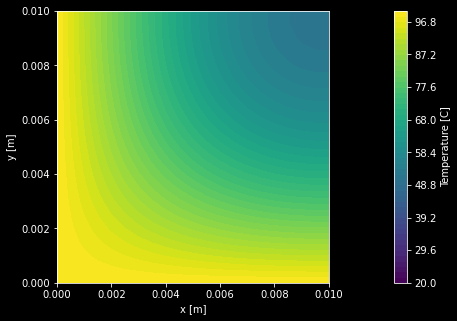

In [315]:
plt.figure(figsize=(8.0, 5.0))
plt.xlabel('x [m]')
plt.ylabel('y [m]')
levels = np.linspace(20.0, 100.0, num=51)
contf = plt.contourf(x, y, T_values[308], levels=levels)
cbar = plt.colorbar(contf)
cbar.set_label('Temperature [C]')
plt.axis('scaled', adjustable='box');

<ipython-input-316-f70e017c7fc0>:6: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  plt.axis('scaled', adjustable='box')


(0.0, 0.01, 0.0, 0.01)

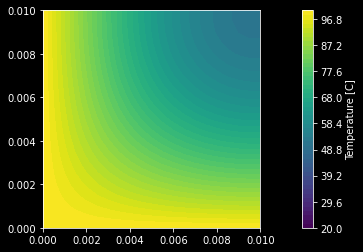

In [316]:
fig, ax = plt.subplots()   
levels = np.linspace(20.0, 100.0, num=51)
contf = plt.contourf(x, y, T_values[309], levels=levels)
cbar = plt.colorbar(contf)
cbar.set_label('Temperature [C]')
plt.axis('scaled', adjustable='box')

In [317]:
def update_plots(i):
    def animate(i):
       ax.clear()
       contf = plt.contourf(x, y, T_values[499], levels=levels)
       ax.contourf(x, y, T_values[i])
       ax.set_title('%03d'%(i)) 


In [318]:
interval = 2  
ani = animation.FuncAnimation(fig,update_plots,5,interval=interval*1e+3,blit=False)
plt.show()

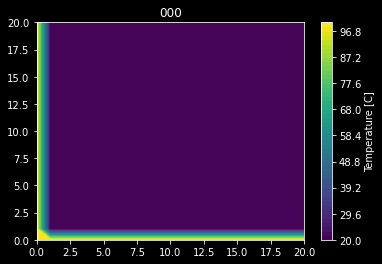

In [319]:
fig,ax = plt.subplots()
cbar = plt.colorbar(contf)
cbar.set_label('Temperature [C]')

def animate(i):
       ax.clear()
       ax.contourf(T_values[i], levels)
       ax.set_title('%03d'%(i))

interval = 0.1    
ani = animation.FuncAnimation(fig,animate,nt,interval=interval*1e+3,blit=False)

HTML(ani.to_html5_video())